This notebooks adapts the R code in Scherer (2024) to show you how to publish your workflow and use mybinder.

**Reference**
Scherer, C. (2024, December 2). Data Analysis & Visualisation According to FAIR Principles. Zenodo. https://doi.org/10.5281/zenodo.14262444

In [47]:
library(readr)
library(dplyr)
library(ggplot2)

## Load and prepare data from TRY and GBIF

In [ ]:
trydb <- read_csv("data/try_reduced.csv")
gbif <- read_csv("data/gbif1.csv")

Clean up extra column (rows names) in TRY data.

In [43]:
trydb <- trydb %>%
dplyr::select(-"...1") %>%
janitor::clean_names(.)

## Wrangle the data

\[Insert basic explanation of what you are doing here.]

In [ ]:
trydb_nitro <- filter(trydb, trait_name == "Leaf nitrogen (N) content per leaf area")
select(trydb_nitro, species_name, std_value)

## Plot

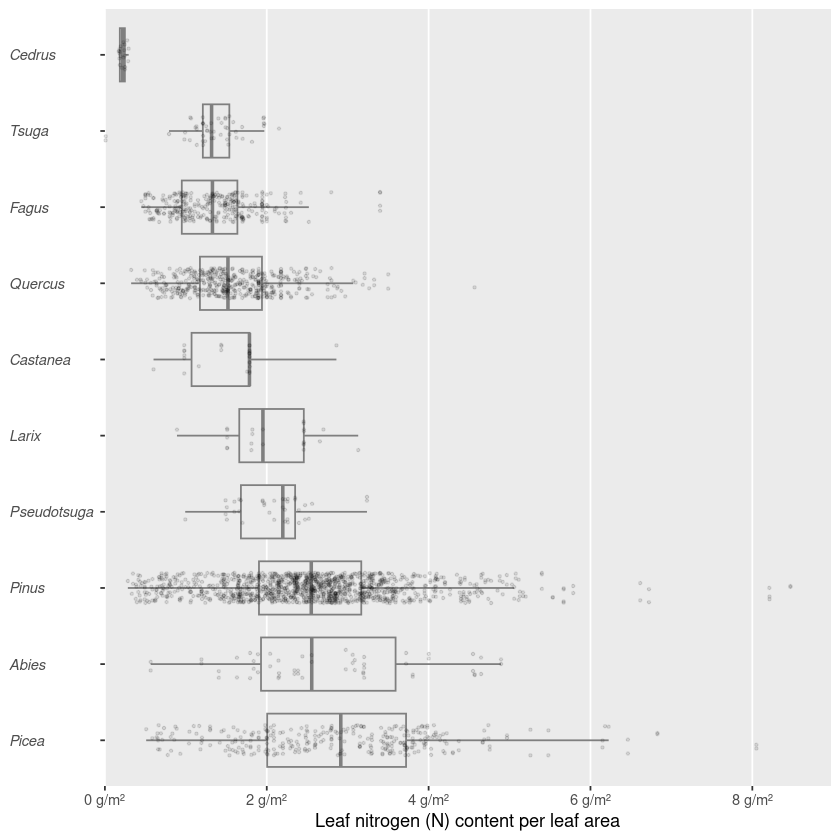

In [55]:
trydb_nitro |> 
  mutate(genus_name = stringr::word(species_name, 1)) |> 
  ggplot() +
  aes(
    x = std_value,
    y = forcats::fct_reorder(genus_name, std_value, .fun = "median")
  ) +
  geom_boxplot(
    color = "grey50",
    fill = "grey92",
    outlier.colour = NA,
    width = .7
  ) +
  geom_jitter(
    height = .2,
    alpha = .1,
    size = .6
  ) +
  coord_cartesian(clip = "off") +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    labels = scales::number_format(suffix = " g/m²")
  ) +
  scale_y_discrete(limits = rev) +
  labs(
    x = "Leaf nitrogen (N) content per leaf area",
    y = NULL
  ) +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0)
  )